In [64]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
train_df = pd.read_csv("../data/train.csv")

In [51]:
# Look at the data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
# Drop NA values for quick model demo
train_df.dropna(inplace = True)

In [53]:
# Replace categories with numeric values
train_df.replace({
    'Gender': {'Male': 0, 'Female': 1}, 
    'Education': {'Graduate': 0, 'Not Graduate': 1}, 
    'Married': { 'Yes': 0, 'No': 1},
    'Self_Employed': { 'Yes': 0, 'No': 1},
    'Loan_Status': { 'Y': 0, 'N': 1}
}, inplace = True)

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,Urban,0
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,Urban,0


In [54]:
# Replace Property areas with dummy values and merge into data frame
property_areas = pd.get_dummies(train_df['Property_Area'], drop_first = True)

train_df = pd.concat([train_df, property_areas], axis = 1)

# Drop Property Area, we do not need it anymore
train_df.drop(['Property_Area'], inplace = True, axis = 1)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,0,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,0,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0,1
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,0,0,1


In [55]:
# Building our Machine Learning model
X = train_df[['Gender','ApplicantIncome','Credit_History','LoanAmount','Education']] # X are all the features 
Y = train_df[['Loan_Status']] # Y is the target we want to predict

In [56]:
# Generate training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 26)

In [58]:
# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# predict the X_test values
predictions = model.predict(X_test)

C:\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


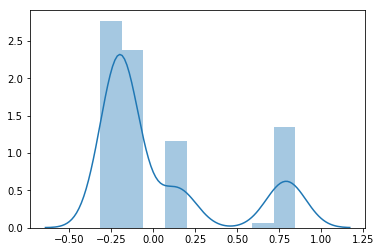

In [62]:
# compare the prediction (line) with Y_test values
sb.distplot(Y_test - predictions)

In [70]:
# Apply the model to a randomly put together data row
# Male, 5000 income, positive credit history, a loan of 300 but no education
myvals = np.array([0, 5000, 1.0, 300, 1]).reshape(1, -1)
model.predict(myvals) # Closer to 0 is higher likelyhood of getting the loan

array([[0.27886539]])

In [73]:
# Apply the model to a randomly put together data row
# Male, 10000 income, negative credit history, a loan of 100 with education
myvals = np.array([0, 10000, 0.0, 100, 0]).reshape(1, -1)
model.predict(myvals) # Closer to 0 is higher likelyhood of getting the loan

array([[0.81510376]])